In [ ]:
import mplfinance as mpf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def calculate_kd(data, period=14):
    data['Lowest14'] = data['Low'].rolling(window=period).min()
    data['Highest14'] = data['High'].rolling(window=period).max()
    data['KD_K'] = 100 * (data['Close'] - data['Lowest14']) / (data['Highest14'] - data['Lowest14'])
    data['KD_D'] = data['KD_K'].rolling(window=3).mean()
    return data


def calculate_kdj(data, n=9, m1=3, m2=3):
    # Calculate highest high and lowest low
    data['HighestHigh'] = data['High'].rolling(window=n).max()
    data['LowestLow'] = data['Low'].rolling(window=n).min()
    
    # Calculate RSV (Raw Stochastic Value)
    data['RSV'] = 100 * (data['Close'] - data['LowestLow']) / (data['HighestHigh'] - data['LowestLow'])
    
    # Calculate K value (Fast Stochastic)
    data['KDJ_K'] = data['RSV'].rolling(window=m1).mean()
    
    # Calculate D value (Slow Stochastic)
    data['KDJ_D'] = data['KDJ_K'].rolling(window=m2).mean()
    
    # Calculate J value
    data['KDJ_J'] = 3 * data['KDJ_K'] - 2 * data['KDJ_D']
    
    return data


file_path = 'F:/python/pystock/data/original'
stock_0050_data = pd.read_csv(f'{file_path}/0050.TW.csv',parse_dates=['Date'],index_col=0).dropna()
# stock_0050_data.index = pd.to_datetime(stock_0050_data.Date)
# stock_0050_data = calculate_kd(stock_0050_data, 14)
stock_0050_data

# df = pd.read_csv('file.csv',parse_dates=['Date'],index_col=0).dropna()
# df = df[(df.index > '2018-06-01')]
# df_plot = df[['Open','High','Low','Close']]

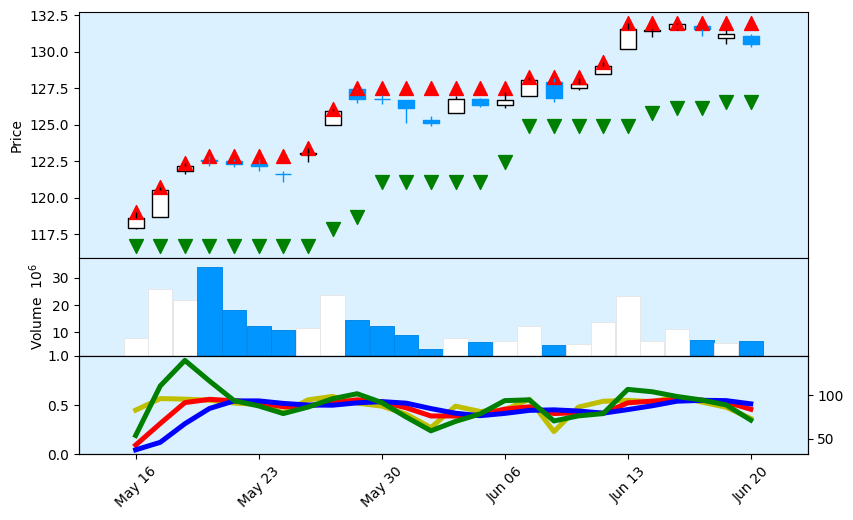

In [35]:
import mplfinance as mpf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def calculate_kdj(data, n=9, m1=3, m2=3):
    # Calculate highest high and lowest low
    data['HighestHigh'] = data['High'].rolling(window=n).max()
    data['LowestLow'] = data['Low'].rolling(window=n).min()
    
    # Calculate RSV (Raw Stochastic Value)
    data['RSV'] = 100 * (data['Close'] - data['LowestLow']) / (data['HighestHigh'] - data['LowestLow'])
    
    # Calculate K value (Fast Stochastic)
    data['KDJ_K'] = data['RSV'].rolling(window=m1).mean()
    
    # Calculate D value (Slow Stochastic)
    data['KDJ_D'] = data['KDJ_K'].rolling(window=m2).mean()
    
    # Calculate J value
    data['KDJ_J'] = 3 * data['KDJ_K'] - 2 * data['KDJ_D']
    
    return data

file_path = 'F:/python/pystock/data/original'
stock_0050_data = pd.read_csv(f'{file_path}/0050.TW.csv',parse_dates=['Date'],index_col=0).dropna()
# stock_0050_data.index = pd.to_datetime(stock_0050_data.Date)
# stock_0050_data = calculate_kd(stock_0050_data, 14)

stock_0050_data = calculate_kdj(stock_0050_data)

date_str = '2023-06-15'
input_date = datetime.strptime(date_str, '%Y-%m-%d')

# 計算 start_date 和 end_date
start_date = input_date - timedelta(days=30)
end_date = input_date + timedelta(days=5)

# 設定日期區間
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')
df = stock_0050_data.loc[start_date_str:end_date_str]
highest_point = mpf.make_addplot(df['HighestHigh'], type='scatter', markersize=100, marker='^', color='red')
lowest_point = mpf.make_addplot(df['LowestLow'], type='scatter', markersize=100, marker='v', color='green')

# 繪製K線圖以及KD指標
ap = [mpf.make_addplot(df['RSV'], panel=2, color='y', secondary_y=True),
      mpf.make_addplot(df['KDJ_K'], panel=2, color='r', secondary_y=True),
      mpf.make_addplot(df['KDJ_D'], panel=2, color='b', secondary_y=True),
      mpf.make_addplot(df['KDJ_J'], panel=2, color='g', secondary_y=True),
      highest_point,
      lowest_point
     ] 

mpf.plot(df,type='candle',addplot=ap,figscale=1.1,figratio=(8,5),
         style='blueskies',volume=True)



In [ ]:
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

stock_data  = pd.read_csv(f'{file_path}/0050.TW.csv',parse_dates=['Date'],index_col=0).dropna()


# Create a function to update the annotations
def update_annotations(i):
    plt.cla()  # Clear the current plot
    mpf.plot(stock_data[i:i+1], type='candle', title='Stock Chart', ylabel='Price')  # Plot a single data point
    plt.annotate(f"{stock_data.iloc[i]['Close']:.2f}", xy=(0, stock_data.iloc[i]['Close']), xytext=(0, 10),
                 textcoords='offset points', ha='center')

# Create the animation
fig = plt.figure()
ani = FuncAnimation(fig, update_annotations, frames=len(stock_data), interval=250)

# Show the animation
plt.show()
fig = plt.figure()
ani = FuncAnimation(fig, update_annotations, frames=len(stock_data), interval=250)

# Show the animation
plt.show()

# or if you want to save the animation as a file
ani.save('./animation.mp4')